In [1]:
# ----------------------- #
# NOTEBOOK HUMAN DATA PROCESSING #
# AUTHOR: XIAOYANG SONG   #
# ----------------------- #
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
path = r"../Dataset/Human Data/IPIP120.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,CASE,SEX,AGE,SEC,MIN,HOUR,DAY,MONTH,YEAR,...,I111,I112,I113,I114,I115,I116,I117,I118,I119,I120
0,0,1.0,2.0,19.0,8.0,41.0,16.0,30.0,6.0,101.0,...,5.0,2.0,4.0,4.0,4.0,2.0,4.0,1.0,5.0,4.0
1,1,2.0,2.0,22.0,24.0,45.0,16.0,30.0,6.0,101.0,...,1.0,4.0,3.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0
2,2,4.0,2.0,22.0,3.0,57.0,16.0,30.0,6.0,101.0,...,2.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,5.0,4.0
3,3,5.0,2.0,22.0,44.0,4.0,17.0,30.0,6.0,101.0,...,1.0,5.0,5.0,5.0,4.0,1.0,5.0,3.0,5.0,3.0
4,4,6.0,1.0,13.0,14.0,6.0,17.0,30.0,6.0,101.0,...,1.0,2.0,4.0,3.0,5.0,2.0,4.0,4.0,3.0,5.0


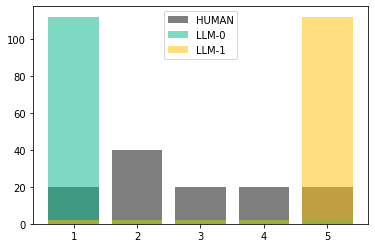

In [61]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import wasserstein_distance as WASS
from scipy.special import kl_div as KL
from scipy.stats import gaussian_kde as KDE

# observed values
human = np.array([1, 3, 4, 5]*20 + [2]*40)
llm_0 = np.array([1]*112 + [2,3,4,5]*2)
llm_1 = np.array([5]*112 + [1,2,3,4]*2)

N = 120
HUMAN = np.array([20, 40, 20, 20, 20])
LLM_0 = np.array([112, 2, 2, 2, 2])
LLM_1 = np.array([2, 2, 2, 2, 112])
# distribution
p_human = HUMAN / N
p_llm_0,  p_llm_1 = LLM_0 / N, LLM_1 / N
# plot
plt.bar(np.arange(1,6), HUMAN, color='black', alpha=0.5, label="HUMAN")
plt.bar(np.arange(1,6), LLM_0, color='#00b384', alpha=0.5, label="LLM-0")
plt.bar(np.arange(1,6), LLM_1, color='#ffbf00', alpha=0.5, label="LLM-1")
plt.legend()
plt.show()

In [62]:
from icecream import ic
# ic(KL(LLM_0, HUMAN).sum())
ic(KL(p_human, p_llm_0).sum())
ic(KL(p_llm_0, p_human).sum())
# 
ic(KL(p_human, p_llm_1).sum())
ic(KL(p_llm_1, p_human).sum())
# 
ic(WASS(human, llm_0))
ic(WASS(llm_0, human))
# 
ic(WASS(human, llm_1))
ic(WASS(llm_1, human))

ic| KL(p_human, p_llm_0).sum(): 1.862742204724836
ic| KL(p_llm_0, p_human).sum(): 1.4428573653494279
ic| KL(p_human, p_llm_1).sum(): 1.862742204724836
ic| KL(p_llm_1, p_human).sum(): 1.442857365349428
ic| WASS(human, llm_0): 1.6666666666666667
ic| WASS(llm_0, human): 1.6666666666666667
ic| WASS(human, llm_1): 2.0
ic| WASS(llm_1, human): 2.0


2.0